# Analyzing the Data of Top 200 songs on Spotify
## Amanuel Awoke
##  Ferzam Mohammad
## Josue Velasquez

# Introduction
## Motivation
The music industry has changed a lot in the last decade with the introduction of streaming services like Apple Music or Spotify. Services like Spotify allow users to livestream music for personal consumption, often for free or for a subscription fee. These services have made it easier to consume music and have increased opportunities for people to start producing music, but they have also changed how musicians make money. Whenever a user listens to a song on a streaming service, the service typically keeps track of the number of “plays” that song has. Music artists are then paid a small amount based on the number of plays they have accumulated for their music. Given how little these artists are paid from streaming services, maximizing the amount of revenue made from a song seems pretty valuable for those looking to push out music to these services. Play count also indicates where a song stands in the streaming services’ popularity lists, and making it onto their top 100 or 200 songs is a factor considered in whether these songs are added to global, official top songs charts i.e. Billboard 200.
 
Our group thought it would be interesting to see if we could try to make predictions for how popular a song might be given different features for a song (e.g. the genre of the song, how fast or slow it is, the key the song is written in, the time of year a song was released, how many listeners an artist already gets on average, etc.). If we can indicate how many plays a song will get, we can give a prediction for how much money a song will make on a streaming service. Much like the Moneyball scenario, it’s possible that artists are focusing on producing music that meets criteria which they think makes a song popular when, in reality, they should be focusing on other aspects of their music. Understanding what components of a song make it popular would help artists figure out the best way to produce music in order to make money off of these streaming services.

The Moneyball story demonstrated the importance of data science in producing a strong baseball team, and while music is different from sports, our project should hopefully reflect similar data science practices in order to reach a valuable conclusion. It may be relatively straightforward to look at aspects like which genres make the most money or whether a song by Taylor Swift will end up on the top 200 chart given her “incredibly loyal fanbase” of over 40 million people, but maybe there are other similarities between popular songs that could indicate factors which help make a song more popular. Data science practices like t-tests (maybe) or machine learning models help us here by giving us tools to help identify characteristics in a song, clarify how those characteristics might relate to play count, and predict what the play count (or popularity) for a similar song could be given factors that we have determined have an affect on play count (or popularity)
<One valuable conclusion might be the LACK OF money artists are being paid from streaming services, or how little they make off streaming services alone>


# Collect Data

This is the first step in the data lifecycle where we must identify information to web scrape. We gather data from the [Spotify Charts Regional Top 200](https://spotifycharts.com/regional) to first identify which songs had the highest stream counts in the United States, dating back to January 1st 2017, to current day. Spotify Charts provides tracks with the highest stream count, their top 200 rank, and the artist(s) who created that song. Spotify Charts already compiles the data into Excel tables, so it isn't necessary to directly scrape from the website. If you wanted to download one yourself, at the top right of the website, select a date you'd like to download in the dropdown, then select further up "Download to CSV." The pandas method read_csv() was used to process the Excel files into dataframes.



In [136]:
import os
import pandas as pd
import requests
from bs4 import BeautifulSoup
import spotipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Since there were consistent download URLs of Excel sheets in relation to the date they recorded, we used a looped to retreive the links then later download all sheets.

In [137]:
# Collect links from spotify charts top 200 streams per day
ref_str = "https://spotifycharts.com/regional/global/daily/"
ref_arr = []
# gets every day from janurary 2017 to October 2020

# for year in range(2017, 2021):
for year in range(2017, 2018):
    date = ""
    
    endingMonth = 12
    if year == 2020:
        endingMonth = 10
        
    # for month in range (1, endingMonth + 1):
    for month in range (1,13):
       
        dayCount = -1

        #gets proper day count per month
        thirtyDayCountMonths = [4, 6, 9, 11]
        if month == 2:
            dayCount = 29
        elif month in thirtyDayCountMonths:
            dayCount = 30
        else:
            dayCount = 31

        if int(month) < 10:
            month = "0" + str(month)
        # for day in range (1, daycount + 1):
        #for day in range (1, 16):
           
        #if int(day) < 10:
        #    day = "0" + str(day)

        date = str(year) + "-" + str(month) + "-" + "01" + "/download"
        date = ref_str + date
        ref_arr.append(date)

ref_arr

['https://spotifycharts.com/regional/global/daily/2017-01-01/download',
 'https://spotifycharts.com/regional/global/daily/2017-02-01/download',
 'https://spotifycharts.com/regional/global/daily/2017-03-01/download',
 'https://spotifycharts.com/regional/global/daily/2017-04-01/download',
 'https://spotifycharts.com/regional/global/daily/2017-05-01/download',
 'https://spotifycharts.com/regional/global/daily/2017-06-01/download',
 'https://spotifycharts.com/regional/global/daily/2017-07-01/download',
 'https://spotifycharts.com/regional/global/daily/2017-08-01/download',
 'https://spotifycharts.com/regional/global/daily/2017-09-01/download',
 'https://spotifycharts.com/regional/global/daily/2017-10-01/download',
 'https://spotifycharts.com/regional/global/daily/2017-11-01/download',
 'https://spotifycharts.com/regional/global/daily/2017-12-01/download']

In [138]:
#Loop downloading and appending of dataframes 

df = pd.DataFrame(columns =['position', 'track_name', 'artist', 'streams', 'url', 'date'] )
#make dir to save to
path = "sheets"
folderExists = False
try:
    os.mkdir(path)
except FileExistsError:
    print ("Folder already exists")
    folderExists = True

for i in ref_arr:

    r = requests.get(i, allow_redirects = True)
    #String manipulation to read from the correct csv files
    date = i[48:58]
    fileName = "regional-global-daily-" + date + ".csv"
    if not folderExists:
        print("Downloading... " + fileName)
        open(fileName, "wb").write(r.content)

        os.rename(fileName, "sheets/" + fileName)

    df_new = pd.read_csv(path + "/" + fileName)
    df_new.columns= ['position', 'track_name', 'artist', 'streams', 'url']
    df_new['date'] = date
    
    df_new = df_new.iloc[1:] #deletes junk row from csv conversion
    df = df.append(df_new)

print("Done")
df = df.reset_index() # Sets index back to being the regular 0-based index. This is really helpful when trying to add more to the dataframe later, because otherwise there are lots of duplicate indices
df['streams'] = df['streams'].astype(int) #streams are a string of a num, must wrap as type int always

Folder already exists
Done


## Wrangled data into dataframe

In [139]:
df

index position                               track_name  \
0         1        1                                  Starboy   
1         2        2                                   Closer   
2         3        3                          Let Me Love You   
3         4        4  Rockabye (feat. Sean Paul & Anne-Marie)   
4         5        5                                One Dance   
...     ...      ...                                      ...   
2395    196      196  Rockabye (feat. Sean Paul & Anne-Marie)   
2396    197      197           Rake It Up (feat. Nicki Minaj)   
2397    198      198       New Freezer (feat. Kendrick Lamar)   
2398    199      199                                All Night   
2399    200      200                                      113   

                artist  streams  \
0           The Weeknd  3135625   
1     The Chainsmokers  3015525   
2             DJ Snake  2545384   
3         Clean Bandit  2356604   
4                Drake  2259887   
...                ...      ...   
2395      Clean Bandit   552118   
2396          Yo Gotti   551576   
2397      Rich The Kid   550167   
2398        Steve Aoki   548039   
2399             Booba   546878   

                                                    url        date  
0     https://open.spotify.com/track/5aAx2yezTd8zXrk...  2017-01-01  
1     https://open.spotify.com/track/7BKLCZ1jbUBVqRi...  2017-01-01  
2     https://open.spotify.com/track/4pdPtRcBmOSQDlJ...  2017-01-01  
3     https://open.spotify.com/track/5knuzwU65gJK7IF...  2017-01-01  
4     https://open.spotify.com/track/1xznGGDReH1oQq0...  2017-01-01  
...                                                 ...         ...  
2395  https://open.spotify.com/track/5knuzwU65gJK7IF...  2017-12-01  
2396  https://open.spotify.com/track/4knL4iPxPOZjQzT...  2017-12-01  
2397  https://open.spotify.com/track/4pYZLpX23Vx8rwD...  2017-12-01  
2398  https://open.spotify.com/track/5mAxA6Q1SIym6dP...  2017-12-01  
2399  https://open.spotify.com/track/6xqAP7kpdgCy8lE...  2017-12-01  

[2400 rows x 7 columns]

# Data Processing

[Spotipy](https://spotipy.readthedocs.io/en/2.16.1/#) is a lightweight Python library for the [Spotify Web API](https://developer.spotify.com/documentation/web-api/) used to retrieve more detailed data for tracks now that their names have been retrieved from the Spotify Top 200. We must first authenticate our usage of the API.

In [140]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials


SPOTIPY_CLIENT_ID="ea1a162fbc6f413990542b76ab82a168"
SPOTIPY_CLIENT_SECRET="a09882042ce54f158fdd2b6baaf2b26d"
SPOTIPY_CLIENT_REDIRECT="http://www.cs.umd.edu/class/fall2020/cmsc320-0201/"

scope = "user-library-read"

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope, client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET, redirect_uri=SPOTIPY_CLIENT_REDIRECT))



We're going to start by using the Spotify API to get more information about all the tracks we found in the top 200's chart for the timeframe we described above. The Spotify API gives us the ability to get "audio features" from a song given a song id that Spotify creates for every track. These "audio features" include characteristics like loudness, positivity, danceability, how energetic the song is, the speed of the song, and a couple other similar characteristics that have been determined by Spotify using their own machine learning algorithms.

First, we do need to get an id for every song and artist in our dataframe to be able to make queries through the Spotify API for a specific track or artist. Here, we get track and artist ids, and we also make a query for the audio features of each track id. We're doing these together for code efficiency, just because a large number of queries through the Spotify API can take time.

In [142]:
import time
import xlsxwriter
import openpyxl

#open time counter
artist_id_list = []
track_id_list = []
audioFeaturesDf = pd.DataFrame()
tic = time.perf_counter()

#if cached df exists dont search again, else search again
if not os.path.exists("cached_df.xlsx"):
    #Take each song and lookup its audio features, then create a dataframe for them
    print("Searching...")
    for index, row in df.iterrows():
        trackName = row['track_name']
        track_id = ""
        artist_id = ""
        #print(trackName)
        # We need to check if our track_name received was a nan value. Idk how these got in here, but there are nans
        if(type(trackName) == str):
            trackNameWithoutSpaces = '+'.join(trackName.split())
            searchQuery = sp.search(trackNameWithoutSpaces, 1, 0)
            #print(searchQuery)
            if (len(searchQuery['tracks']['items']) != 0):
                track_object = searchQuery['tracks']['items'][0]
                #print(track_object)
                artist_object = track_object['artists'][0] if type(track_object['artists']) is list else track_object['artists']
                artist_id = artist_object['id']
                track_id = track_object['id']
                #print(track_id)
                artist_id_list.append(artist_id)
                track_id_list.append(track_id)

             # If our query returned nothing then append a nan in the place of artist and track for this entry
            else:
                artist_id_list.append(np.nan)
                track_id_list.append(np.nan)
        # If we had stored a nan, then just plan to append a nan in this position
        else:
            artist_id_list.append(np.nan)
            track_id_list.append(np.nan)
            
        audiofeatures = {'duration_ms' : np.nan, 'key' : np.nan, 'mode' : np.nan, 'time_signature' : np.nan, 'acousticness' : np.nan, 'danceability' : np.nan, 'energy' : np.nan, 'instrumentalness' : np.nan, 'liveness' : np.nan, 'loudness' : np.nan, 'speechiness' : np.nan, 'valence' : np.nan, 'tempo' : np.nan, 'id' : np.nan, 'uri' : np.nan, 'track_href' : np.nan, 'analysis_url' : np.nan, 'type' : np.nan, }
        # If we successfully found a track when we did our seach, then get the audio features for that
        #print(track_id)
        if (track_id != ""):
            audiofeatures = sp.audio_features(track_id)[0]

        audioFeaturesDf = audioFeaturesDf.append(audiofeatures, ignore_index=True)
    # Create a Pandas Excel writer using XlsxWriter as the engine.
    writer = pd.ExcelWriter('cached_df.xlsx', engine='openpyxl')

    # Convert the dataframe to an XlsxWriter Excel object.
    audioFeaturesDf.to_excel(writer, sheet_name='Sheet1')
    # Close the Pandas Excel writer and output the Excel file.
    writer.save()
    toc = time.perf_counter()
    print(f"Searches took {toc - tic:0.4f} mf seconds damn")

else: #access the cached
 
    print("Cached dataframe found.")
    audioFeaturesDf = pd.read_excel("cached_df.xlsx", engine = "openpyxl")
    audioFeaturesDf.drop(["Unnamed: 0"], axis=1, inplace=True) #delete position row since rank alraedy has this information

audioFeaturesDf

Searching...
Searches took 467.0111 mf seconds damn


acousticness                                       analysis_url  \
0          0.14100  https://api.spotify.com/v1/audio-analysis/7MXV...   
1          0.41400  https://api.spotify.com/v1/audio-analysis/7BKL...   
2          0.23500  https://api.spotify.com/v1/audio-analysis/3ibK...   
3          0.40600  https://api.spotify.com/v1/audio-analysis/5knu...   
4          0.00776  https://api.spotify.com/v1/audio-analysis/1zi7...   
...            ...                                                ...   
2395       0.40600  https://api.spotify.com/v1/audio-analysis/5knu...   
2396       0.02200  https://api.spotify.com/v1/audio-analysis/4knL...   
2397       0.04050  https://api.spotify.com/v1/audio-analysis/2EgB...   
2398       0.00410  https://api.spotify.com/v1/audio-analysis/0dXN...   
2399       0.00805  https://api.spotify.com/v1/audio-analysis/0leV...   

      danceability  duration_ms  energy                      id  \
0            0.679     230453.0   0.587  7MXVkk9YMctZqd1Srtv4MB   
1            0.748     244960.0   0.524  7BKLCZ1jbUBVqRi2FVlTVw   
2            0.656     256733.0   0.578  3ibKnFDaa3GhpPGlOUj7ff   
3            0.720     251088.0   0.763  5knuzwU65gJK7IF5yJsuaW   
4            0.792     173987.0   0.625  1zi7xx7UVEFkmKfv06H8x0   
...            ...          ...     ...                     ...   
2395         0.720     251088.0   0.763  5knuzwU65gJK7IF5yJsuaW   
2396         0.910     276333.0   0.444  4knL4iPxPOZjQzTUlELGSY   
2397         0.884     191938.0   0.698  2EgB4n6XyBsuNUbuarr4eG   
2398         0.538     197640.0   0.804  0dXNQ8dckG4eYfEtq9zcva   
2399         0.740     266672.0   0.510  0leVyLipY7A8ruhkIBqc0E   

      instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0             0.000006  7.0     0.137    -7.015   1.0       0.2760  186.003   
1             0.000000  8.0     0.111    -5.599   1.0       0.0338   95.010   
2             0.000000  7.0     0.118    -8.970   0.0       0.0922   94.514   
3             0.000000  9.0     0.180    -4.068   0.0       0.0523  101.965   
4             0.001800  1.0     0.329    -5.609   1.0       0.0536  103.967   
...                ...  ...       ...       ...   ...          ...      ...   
2395          0.000000  9.0     0.180    -4.068   0.0       0.0523  101.965   
2396          0.000000  1.0     0.137    -8.126   0.0       0.3440  149.953   
2397          0.000000  0.0     0.195    -9.101   1.0       0.3640  140.068   
2398          0.000000  8.0     0.330    -5.194   1.0       0.0358  144.992   
2399          0.000375  9.0     0.128    -8.042   1.0       0.0780  141.534   

      time_signature                                         track_href  \
0                4.0  https://api.spotify.com/v1/tracks/7MXVkk9YMctZ...   
1                4.0  https://api.spotify.com/v1/tracks/7BKLCZ1jbUBV...   
2                4.0  https://api.spotify.com/v1/tracks/3ibKnFDaa3Gh...   
3                4.0  https://api.spotify.com/v1/tracks/5knuzwU65gJK...   
4                4.0  https://api.spotify.com/v1/tracks/1zi7xx7UVEFk...   
...              ...                                                ...   
2395             4.0  https://api.spotify.com/v1/tracks/5knuzwU65gJK...   
2396             4.0  https://api.spotify.com/v1/tracks/4knL4iPxPOZj...   
2397             4.0  https://api.spotify.com/v1/tracks/2EgB4n6XyBsu...   
2398             4.0  https://api.spotify.com/v1/tracks/0dXNQ8dckG4e...   
2399             5.0  https://api.spotify.com/v1/tracks/0leVyLipY7A8...   

                type                                   uri  valence  
0     audio_features  spotify:track:7MXVkk9YMctZqd1Srtv4MB    0.486  
1     audio_features  spotify:track:7BKLCZ1jbUBVqRi2FVlTVw    0.661  
2     audio_features  spotify:track:3ibKnFDaa3GhpPGlOUj7ff    0.556  
3     audio_features  spotify:track:5knuzwU65gJK7IF5yJsuaW    0.742  
4     audio_features  spotify:track:1zi7xx7UVEFkmKfv06H8x0    0.370  
...              ...                                  

In [143]:

#Append audio features to master dataframe
audioFeaturesDf
df['duration_ms'] = audioFeaturesDf['duration_ms']
df['acousticness'] = audioFeaturesDf['acousticness']
df['danceability'] = audioFeaturesDf['danceability']
df['energy'] = audioFeaturesDf['energy']
df['instrumentalness'] = audioFeaturesDf['instrumentalness']
df['liveness'] = audioFeaturesDf['liveness']
df['loudness'] = audioFeaturesDf['loudness']
df['speechiness'] = audioFeaturesDf['speechiness']
df['valence'] = audioFeaturesDf['valence']
df['tempo'] = audioFeaturesDf['tempo']
df

df

index position                               track_name  \
0         1        1                                  Starboy   
1         2        2                                   Closer   
2         3        3                          Let Me Love You   
3         4        4  Rockabye (feat. Sean Paul & Anne-Marie)   
4         5        5                                One Dance   
...     ...      ...                                      ...   
2395    196      196  Rockabye (feat. Sean Paul & Anne-Marie)   
2396    197      197           Rake It Up (feat. Nicki Minaj)   
2397    198      198       New Freezer (feat. Kendrick Lamar)   
2398    199      199                                All Night   
2399    200      200                                      113   

                artist  streams  \
0           The Weeknd  3135625   
1     The Chainsmokers  3015525   
2             DJ Snake  2545384   
3         Clean Bandit  2356604   
4                Drake  2259887   
...                ...      ...   
2395      Clean Bandit   552118   
2396          Yo Gotti   551576   
2397      Rich The Kid   550167   
2398        Steve Aoki   548039   
2399             Booba   546878   

                                                    url        date  \
0     https://open.spotify.com/track/5aAx2yezTd8zXrk...  2017-01-01   
1     https://open.spotify.com/track/7BKLCZ1jbUBVqRi...  2017-01-01   
2     https://open.spotify.com/track/4pdPtRcBmOSQDlJ...  2017-01-01   
3     https://open.spotify.com/track/5knuzwU65gJK7IF...  2017-01-01   
4     https://open.spotify.com/track/1xznGGDReH1oQq0...  2017-01-01   
...                                                 ...         ...   
2395  https://open.spotify.com/track/5knuzwU65gJK7IF...  2017-12-01   
2396  https://open.spotify.com/track/4knL4iPxPOZjQzT...  2017-12-01   
2397  https://open.spotify.com/track/4pYZLpX23Vx8rwD...  2017-12-01   
2398  https://open.spotify.com/track/5mAxA6Q1SIym6dP...  2017-12-01   
2399  https://open.spotify.com/track/6xqAP7kpdgCy8lE...  2017-12-01   

      duration_ms  acousticness  danceability  energy  instrumentalness  \
0        230453.0       0.14100         0.679   0.587          0.000006   
1        244960.0       0.41400         0.748   0.524          0.000000   
2        256733.0       0.23500         0.656   0.578          0.000000   
3        251088.0       0.40600         0.720   0.763          0.000000   
4        173987.0       0.00776         0.792   0.625          0.001800   
...           ...           ...           ...     ...               ...   
2395     251088.0       0.40600         0.720   0.763          0.000000   
2396     276333.0       0.02200         0.910   0.444          0.000000   
2397     191938.0       0.04050         0.884   0.698          0.000000   
2398     197640.0       0.00410         0.538   0.804          0.000000   
2399     266672.0       0.00805         0.740   0.510          0.000375   

      liveness  loudness  speechiness  valence    tempo  
0        0.137    -7.015       0.2760    0.486  186.003  
1        0.111    -5.599       0.0338    0.661   95.010  
2        0.118    -8.970       0.0922    0.556   94.514  
3        0.180    -4.068       0.0523    0.742  101.965  
4        0.329    -5.609       0.0536    0.370  103.967  
...        ...       ...          ...      ...      ...  
2395     0.180    -4.068       0.0523    0.742  101.965  
2396     0.137    -8.126       0.3440    0.530  149.953  
2397     0.195    -9.101       0.3640    0.575  140.068  
2398     0.330    -5.194       0.0358    0.507  144.992  
2399     0.128    -8.042       0.0780    0.089  141.534  

[2400 rows x 17 columns]

In [144]:
#visualization
#plotting all the new metrics in our dataframe vs streams
df['streams'] = df['streams'].astype(float)
df['position'] = df['position'].astype(int)
df.loc[df['position'] == 1].head(10) # Previously this was showing that every 

index  position                track_name        artist    streams  \
0         1         1                   Starboy    The Weeknd  3135625.0   
200       1         1              Shape of You    Ed Sheeran  7549041.0   
400       1         1              Shape of You    Ed Sheeran  7201132.0   
600       1         1              Shape of You    Ed Sheeran  6815498.0   
800       1         1         Despacito - Remix    Luis Fonsi  6360737.0   
1000      1         1         Despacito - Remix    Luis Fonsi  7332260.0   
1200      1         1         Despacito - Remix    Luis Fonsi  6398530.0   
1400      1         1                  Mi Gente      J Balvin  4529147.0   
1600      1         1  Look What You Made Me Do  Taylor Swift  5547962.0   
1800      1         1                  rockstar   Post Malone  5649503.0   

                                                    url        date  \
0     https://open.spotify.com/track/5aAx2yezTd8zXrk...  2017-01-01   
200   https://open.spotify.com/track/7qiZfU4dY1lWllz...  2017-02-01   
400   https://open.spotify.com/track/7qiZfU4dY1lWllz...  2017-03-01   
600   https://open.spotify.com/track/7qiZfU4dY1lWllz...  2017-04-01   
800   https://open.spotify.com/track/5CtI0qwDJkDQGwX...  2017-05-01   
1000  https://open.spotify.com/track/5CtI0qwDJkDQGwX...  2017-06-01   
1200  https://open.spotify.com/track/5CtI0qwDJkDQGwX...  2017-07-01   
1400  https://open.spotify.com/track/2rb5MvYT7ZIxbKW...  2017-08-01   
1600  https://open.spotify.com/track/6uFsE1JgZ20EXyU...  2017-09-01   
1800  https://open.spotify.com/track/1OmcAT5Y8eg5bUP...  2017-10-01   

      duration_ms  acousticness  danceability  energy  instrumentalness  \
0        230453.0        0.1410         0.679   0.587          0.000006   
200      233713.0        0.5810         0.825   0.652          0.000000   
400      233713.0        0.5810         0.825   0.652          0.000000   
600      233713.0        0.5810         0.825   0.652          0.000000   
800      228827.0        0.2280         0.653   0.816          0.000000   
1000     228827.0        0.2280         0.653   0.816          0.000000   
1200     228827.0        0.2280         0.653   0.816          0.000000   
1400     189440.0        0.0179         0.774   0.687          0.000012   
1600     211853.0        0.2040         0.766   0.709          0.000014   
1800     181733.0        0.2470         0.746   0.690          0.000000   

      liveness  loudness  speechiness  valence    tempo  
0       0.1370    -7.015       0.2760    0.486  186.003  
200     0.0931    -3.183       0.0802    0.931   95.977  
400     0.0931    -3.183       0.0802    0.931   95.977  
600     0.0931    -3.183       0.0802    0.931   95.977  
800     0.0967    -4.353       0.1670    0.816  178.085  
1000    0.0967    -4.353       0.1670    0.816  178.085  
1200    0.0967    -4.353       0.1670    0.816  178.085  
1400    0.1280    -4.818       0.0584    0.308  104.959  
1600    0.1260    -6.471       0.1230    0.506  128.070  
1800    0.1010    -7.956       0.1640    0.497   89.977

# Data Visualization

We've now gathered the 

[1097520.43, 1019379.44, 1076606.2, 1073350.34, 1073246.65, 1098920.77, 1230296.48, 1029408.45, 988601.74, 899979.33, 1022124.39, 924908.2, 1143202.42, 1123726.58, 1024477.91, 1005277.94, 886959.99, 944785.86, 938172.21, 942483.08, 1030140.01, 1093606.35, 1022184.6, 1104526.06, 1048047.07, 1058241.37, 980440.82, 917284.07, 994428.39, 941254.14, 1053182.27, 911329.6, 1006755.79, 1042611.14, 1074255.17, 938664.59, 984580.91, 1157673.77, 1086417.66, 1034655.9, 984828.02, 939038.07, 941307.29, 1102833.03, 982526.94, 926597.82, 1135580.26, 932353.99, 1019387.47, 1103900.6, 1160343.67, 1012833.62, 980700.66, 1150064.32, 1062217.21, 1065662.65, 942614.0, 1094591.84, 1090698.52, 1036142.51, 1140599.04, 1167634.78, 923695.45, 1010930.34, 988084.24, 1049944.19, 1015597.23, 959505.18, 1007129.43, 1013079.39, 900630.08, 977537.05, 1153831.94, 1056630.17, 1038785.62, 953824.69, 983610.6, 1127578.13, 942432.24, 1068597.66, 963533.51, 1151427.64, 1102073.72, 934572.77, 964123.31, 1075446.96, 972843.4

Text(0, 0.5, 'Frequency')

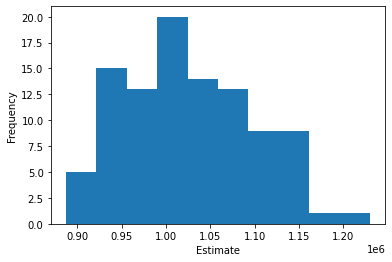

In [145]:
#Histogram takes 100 random tracks, takes the average of all their streams, then does this 100 times
#Is a standarrd deviation


from scipy.stats import normaltest
from numpy.random import seed
from numpy.random import randn


alpha = 0.05
#data = df['tempo'].sample(n=10).array
data = []
for i in range(0,100):
    data.append(np.mean(df['streams'].sample(n=100)))
print(data)
plt.hist(data)
plt.xlabel("Estimate")
plt.ylabel("Frequency")


In [146]:
from sklearn import linear_model

#Get averages of each col
duration_mean = np.mean(df['duration_ms'])
acousticness_mean = np.mean(df['acousticness'])
danceability_mean = np.mean(df['danceability'])
energy_mean = np.mean(df['energy'])
instrumentalness_mean = np.mean(df['instrumentalness'])
liveness_mean = np.mean(df['liveness'])
loudness_mean = np.mean(df['loudness'])
speechiness_mean = np.mean(df['speechiness'])
valence_mean = np.mean(df['valence'])
tempo_mean = np.mean(df['tempo'])

print(duration_mean)

218169.1349137931


Text(0, 0.5, 'streams in millions')

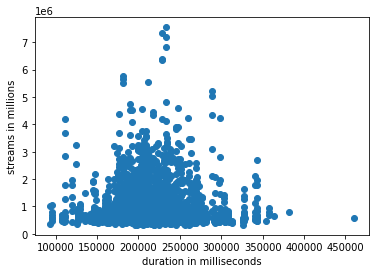

In [147]:
plt.scatter(df['duration_ms'], df['streams'])
plt.xlabel('duration in milliseconds')
plt.ylabel('streams in millions')

Text(0, 0.5, 'streams in millions')

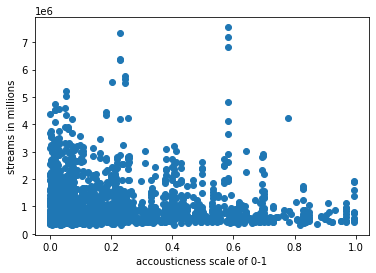

In [148]:
plt.scatter(df['acousticness'],df['streams'])
plt.xlabel('accousticness scale of 0-1')
plt.ylabel('streams in millions')

Text(0, 0.5, 'streams in millions')

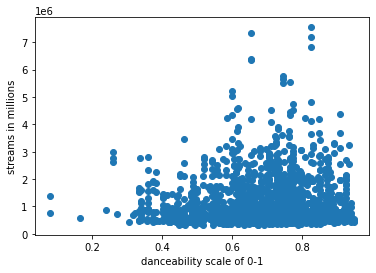

In [149]:
plt.scatter(df['danceability'],df['streams'])
plt.xlabel('danceability scale of 0-1')
plt.ylabel('streams in millions')

Text(0, 0.5, 'streams in millions')

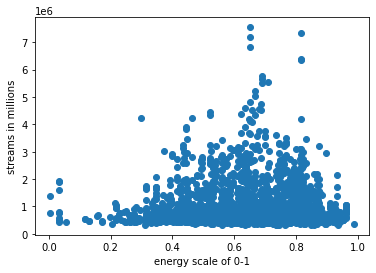

In [150]:
plt.scatter(df['energy'],df['streams'])
plt.xlabel('energy scale of 0-1')
plt.ylabel('streams in millions')

Text(0, 0.5, 'streams in millions')

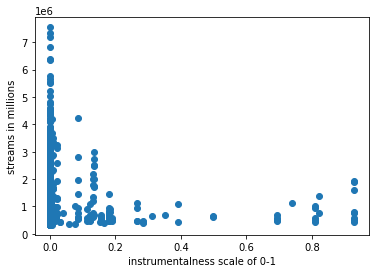

In [151]:
plt.scatter(df['instrumentalness'],df['streams'])
plt.xlabel('instrumentalness scale of 0-1')
plt.ylabel('streams in millions')

Text(0, 0.5, 'streams in millions')

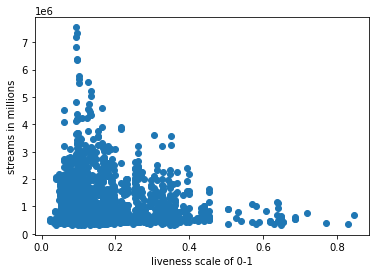

In [152]:
plt.scatter(df['liveness'],df['streams'])
plt.xlabel('liveness scale of 0-1') 
plt.ylabel('streams in millions')

Text(0, 0.5, 'streams in millions')

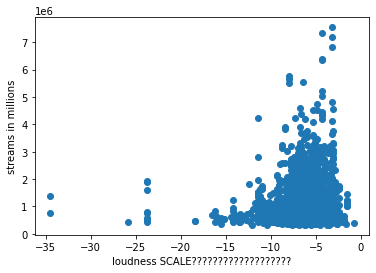

In [153]:
plt.scatter(df['loudness'],df['streams'])
plt.xlabel('loudness SCALE???????????????????')
plt.ylabel('streams in millions')

Text(0, 0.5, 'streams in millions')

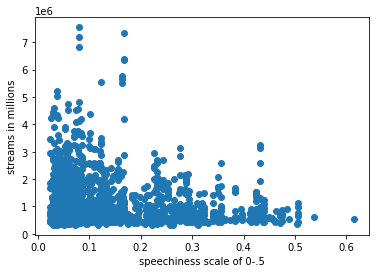

In [154]:
plt.scatter(df['speechiness'],df['streams'])
plt.xlabel('speechiness scale of 0-.5')
plt.ylabel('streams in millions')

Text(0, 0.5, 'streams in millions')

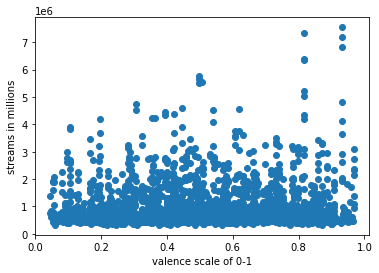

In [155]:
plt.scatter(df['valence'],df['streams'])
plt.xlabel('valence scale of 0-1')
plt.ylabel('streams in millions')

Text(0, 0.5, 'streams in millions')

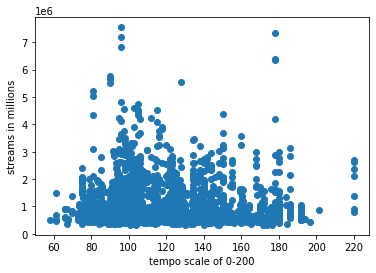

In [156]:
plt.scatter(df['tempo'],df['streams'])
plt.xlabel('tempo scale of 0-200')
plt.ylabel('streams in millions')

In [157]:
#violin plot of genre vs streams in millions
# ax = sns.violinplot(x='genre', y='streams', data=df, palette='muted')


Text(0, 0.5, 'streams in millions')

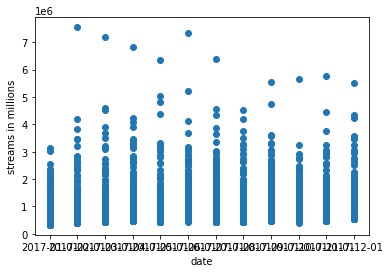

In [158]:
plt.scatter(df['date'],df['streams'])
plt.xlabel('date')
plt.ylabel('streams in millions')

# Insight
Does popularity/followers make a difference?

In [160]:
top5s = df.loc[df['position'] <= 5]
top5s.head()

index  position                               track_name            artist  \
0      1         1                                  Starboy        The Weeknd   
1      2         2                                   Closer  The Chainsmokers   
2      3         3                          Let Me Love You          DJ Snake   
3      4         4  Rockabye (feat. Sean Paul & Anne-Marie)      Clean Bandit   
4      5         5                                One Dance             Drake   

     streams                                                url        date  \
0  3135625.0  https://open.spotify.com/track/5aAx2yezTd8zXrk...  2017-01-01   
1  3015525.0  https://open.spotify.com/track/7BKLCZ1jbUBVqRi...  2017-01-01   
2  2545384.0  https://open.spotify.com/track/4pdPtRcBmOSQDlJ...  2017-01-01   
3  2356604.0  https://open.spotify.com/track/5knuzwU65gJK7IF...  2017-01-01   
4  2259887.0  https://open.spotify.com/track/1xznGGDReH1oQq0...  2017-01-01   

   duration_ms  acousticness  danceability  energy  instrumentalness  \
0     230453.0       0.14100         0.679   0.587          0.000006   
1     244960.0       0.41400         0.748   0.524          0.000000   
2     256733.0       0.23500         0.656   0.578          0.000000   
3     251088.0       0.40600         0.720   0.763          0.000000   
4     173987.0       0.00776         0.792   0.625          0.001800   

   liveness  loudness  speechiness  valence    tempo  
0     0.137    -7.015       0.2760    0.486  186.003  
1     0.111    -5.599       0.0338    0.661   95.010  
2     0.118    -8.970       0.0922    0.556   94.514  
3     0.180    -4.068       0.0523    0.742  101.965  
4     0.329    -5.609       0.0536    0.370  103.967

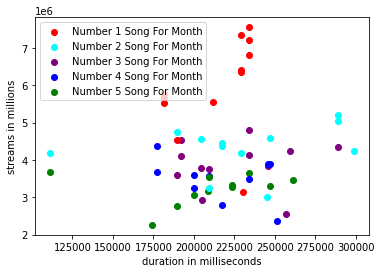

In [161]:
color_list = ['r', 'cyan', 'purple', 'b', 'green']

i = 0
for index, row in top5s.iterrows():
    plt.scatter(row['duration_ms'],row['streams'], color=color_list[i])
    i = (i + 1) % 5

plt.xlabel('duration in milliseconds')
plt.ylabel('streams in millions')
plt.legend(['Number 1 Song For Month', 'Number 2 Song For Month', 'Number 3 Song For Month', 'Number 4 Song For Month', 'Number 5 Song For Month'])


This graph Shows how the duration of a song in milliseconds compares to the number of streams that song received, and we're only using the first 10 pieces of data from our dataframe. This shows us that the songs with the most streams from this set of data are songs which are > 240000 ms, or 4 minutes. This is surprising, because the average song is usually around 3 minutes and 30 seconds or less.

Text(0, 0.5, 'streams in millions')

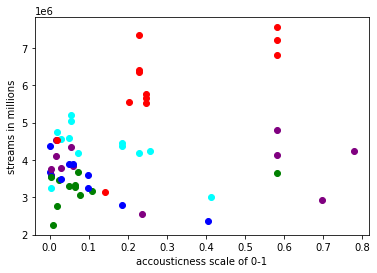

In [162]:
i = 0
for index, row in top5s.iterrows():
    plt.scatter(row['acousticness'],row['streams'], color=color_list[i])
    i = (i + 1) % 5

plt.xlabel('accousticness scale of 0-1')
plt.ylabel('streams in millions')
#plt.legend(['Number 1 Song For Month', 'Number 2 Song For Month', 'Number 3 Song For Month', 'Number 4 Song For Month', 'Number 5 Song For Month'])

This graph displays a confidence score for how likely it is that a song is acoustic (with a value of 1 being very likely that the song is acoustic) compared to the number of streams the song has. All of the confidence scores are less than .5, which indicates most of these songs are probably not acoustic

Text(0, 0.5, 'streams in millions')

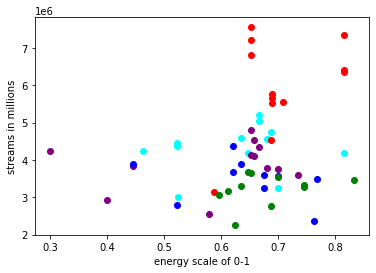

In [163]:
i = 0
for index, row in top5s.iterrows():
    plt.scatter(row['energy'],row['streams'], color=color_list[i])
    i = (i + 1) % 5

plt.xlabel('energy scale of 0-1')
plt.ylabel('streams in millions')
#plt.legend(['Number 1 Song For Month', 'Number 2 Song For Month', 'Number 3 Song For Month', 'Number 4 Song For Month', 'Number 5 Song For Month'])

This graph shows how the "energy" of a song, or generally how noisy and fast the song is, compares to the number of streams for the top 10 songs on the 1st of January. Here, we see that the songs with the most streams are around or above .6 on the energy scale (a higher score means the song is higher energy)

Text(0, 0.5, 'streams in millions')

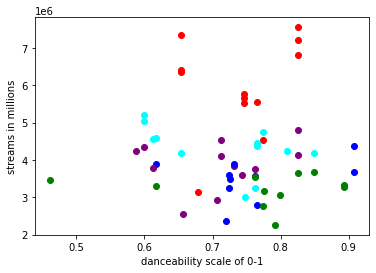

In [164]:
i = 0
for index, row in top5s.iterrows():
    plt.scatter(row['danceability'],row['streams'], color=color_list[i])
    i = (i + 1) % 5

plt.xlabel('danceability scale of 0-1')
plt.ylabel('streams in millions')
#plt.legend(['Number 1 Song For Month', 'Number 2 Song For Month', 'Number 3 Song For Month', 'Number 4 Song For Month', 'Number 5 Song For Month'])

This graph shows how "danceable" a song is using a value provided to us by the Spotify API comapred to the number of streams that song got. Danceability is measured as a value from 0 to 1, where 1 is most danceable. This graph appears to be similar to the graph describing, so they may have been determined using similar characteristisc (i.e. both are measuring how upbeat or fast a song is)

Text(0, 0.5, 'streams in millions')

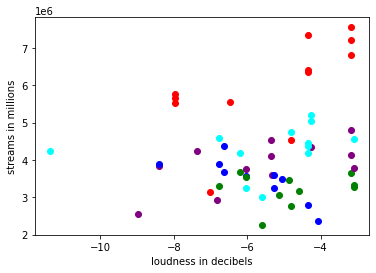

In [165]:
i = 0
for index, row in top5s.iterrows():
    plt.scatter(row['loudness'],row['streams'], color=color_list[i])
    i = (i + 1) % 5

plt.xlabel('loudness in decibels')
plt.ylabel('streams in millions')
#plt.legend(['Number 1 Song For Month', 'Number 2 Song For Month', 'Number 3 Song For Month', 'Number 4 Song For Month', 'Number 5 Song For Month'])

This graph describes the average volume of each track in our top 5s data set compared to the number of streams each song had. It appears to trend similarly to the last two graphs, indicating that the volume of a track may be correlated with how danceable or energetic a song is.

Text(0, 0.5, 'streams in millions')

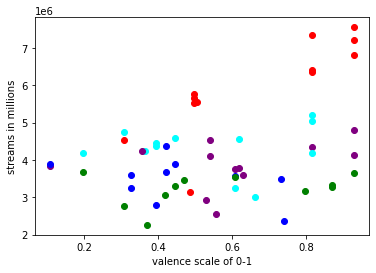

In [166]:
i = 0
for index, row in top5s.iterrows():
    plt.scatter(row['valence'],row['streams'], color=color_list[i])
    i = (i + 1) % 5

plt.xlabel('valence scale of 0-1')
plt.ylabel('streams in millions')
#plt.legend(['Number 1 Song For Month', 'Number 2 Song For Month', 'Number 3 Song For Month', 'Number 4 Song For Month', 'Number 5 Song For Month'])

This graph describes the "valence" of a song compared to the # of streams it got. Valence is described as the "positivity" of a song where "Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)," according to the Spotify API reference. The reference does not describe how this value is determined, but our data seems to show there may be a correlation between valence and the number of streams a song is getting in the set of number 1 songs. However, this graph does not take into account the other features for the songs. It may be worth trying to consider songs where features except for this one are held to a constant, so that we can consider if there is a correlation between this value and the number of streams.

Text(0, 0.5, 'streams in millions')

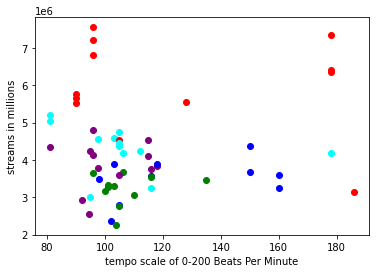

In [167]:
i = 0
for index, row in top5s.iterrows():
    plt.scatter(row['tempo'],row['streams'], color=color_list[i])
    i = (i + 1) % 5

plt.xlabel('tempo scale of 0-200 Beats Per Minute')
plt.ylabel('streams in millions')
#plt.legend(['Number 1 Song For Month', 'Number 2 Song For Month', 'Number 3 Song For Month', 'Number 4 Song For Month', 'Number 5 Song For Month'])

This graph describes the tempo of a song comapred to the number of streams that song has. Given our dataset, it is unclear whether there is a correlation between the tempo of a song and the number of streams it gets.

There appeared to be a potential relationship between valence and the number of streams a song was getting, so it might be interesting to look at what the different features are like for songs with a valence of around .4 or higher

In [168]:
highValenceTopTracks = top5s.loc[top5s['valence'] > .4]
highValenceTopTracks.sort_values('streams', ascending=False).head(10)

index  position                track_name        artist    streams  \
200       1         1              Shape of You    Ed Sheeran  7549041.0   
1000      1         1         Despacito - Remix    Luis Fonsi  7332260.0   
400       1         1              Shape of You    Ed Sheeran  7201132.0   
600       1         1              Shape of You    Ed Sheeran  6815498.0   
1200      1         1         Despacito - Remix    Luis Fonsi  6398530.0   
800       1         1         Despacito - Remix    Luis Fonsi  6360737.0   
2000      1         1                  rockstar   Post Malone  5755610.0   
1800      1         1                  rockstar   Post Malone  5649503.0   
1600      1         1  Look What You Made Me Do  Taylor Swift  5547962.0   
2200      1         1                  rockstar   Post Malone  5528701.0   

                                                    url        date  \
200   https://open.spotify.com/track/7qiZfU4dY1lWllz...  2017-02-01   
1000  https://open.spotify.com/track/5CtI0qwDJkDQGwX...  2017-06-01   
400   https://open.spotify.com/track/7qiZfU4dY1lWllz...  2017-03-01   
600   https://open.spotify.com/track/7qiZfU4dY1lWllz...  2017-04-01   
1200  https://open.spotify.com/track/5CtI0qwDJkDQGwX...  2017-07-01   
800   https://open.spotify.com/track/5CtI0qwDJkDQGwX...  2017-05-01   
2000  https://open.spotify.com/track/7wGoVu4Dady5GV0...  2017-11-01   
1800  https://open.spotify.com/track/1OmcAT5Y8eg5bUP...  2017-10-01   
1600  https://open.spotify.com/track/6uFsE1JgZ20EXyU...  2017-09-01   
2200  https://open.spotify.com/track/7wGoVu4Dady5GV0...  2017-12-01   

      duration_ms  acousticness  danceability  energy  instrumentalness  \
200      233713.0         0.581         0.825   0.652          0.000000   
1000     228827.0         0.228         0.653   0.816          0.000000   
400      233713.0         0.581         0.825   0.652          0.000000   
600      233713.0         0.581         0.825   0.652          0.000000   
1200     228827.0         0.228         0.653   0.816          0.000000   
800      228827.0         0.228         0.653   0.816          0.000000   
2000     181733.0         0.247         0.746   0.690          0.000000   
1800     181733.0         0.247         0.746   0.690          0.000000   
1600     211853.0         0.204         0.766   0.709          0.000014   
2200     181733.0         0.247         0.746   0.690          0.000000   

      liveness  loudness  speechiness  valence    tempo  
200     0.0931    -3.183       0.0802    0.931   95.977  
1000    0.0967    -4.353       0.1670    0.816  178.085  
400     0.0931    -3.183       0.0802    0.931   95.977  
600     0.0931    -3.183       0.0802    0.931   95.977  
1200    0.0967    -4.353       0.1670    0.816  178.085  
800     0.0967    -4.353       0.1670    0.816  178.085  
2000    0.1010    -7.956       0.1640    0.497   89.977  
1800    0.1010    -7.956       0.1640    0.497   89.977  
1600    0.1260    -6.471       0.1230    0.506  128.070  
2200    0.1010    -7.956       0.1640    0.497   89.977

We have duplicate pieces of data, so lets remove the duplicates for this test. We're going to try to keep the versions of the song that have the most streams

In [169]:
highValenceTopTracks = highValenceTopTracks.sort_values('streams', ascending=False).drop_duplicates(['artist', 'duration_ms', 'acousticness', 'danceability', 'energy'], keep='first') # Keeping the last seen version of each song, as that will probably hold it's total streams more accurately
highValenceTopTracks.sort_values('streams', ascending=False).head(10)

index  position                                     track_name  \
200       1         1                                   Shape of You   
1000      1         1                              Despacito - Remix   
2000      1         1                                       rockstar   
1600      1         1                       Look What You Made Me Do   
1001      2         2                                    I'm the One   
401       2         2                       Something Just Like This   
1201      2         2  Wild Thoughts (feat. Rihanna & Bryson Tiller)   
402       3         3                It Ain't Me (with Selena Gomez)   
803       4         4                                        HUMBLE.   
2002      3         3                                      New Rules   

                artist    streams  \
200         Ed Sheeran  7549041.0   
1000        Luis Fonsi  7332260.0   
2000       Post Malone  5755610.0   
1600      Taylor Swift  5547962.0   
1001         DJ Khaled  5208996.0   
401   The Chainsmokers  4581789.0   
1201         DJ Khaled  4558126.0   
402               Kygo  4529714.0   
803     Kendrick Lamar  4371886.0   
2002          Dua Lipa  3758506.0   

                                                    url        date  \
200   https://open.spotify.com/track/7qiZfU4dY1lWllz...  2017-02-01   
1000  https://open.spotify.com/track/5CtI0qwDJkDQGwX...  2017-06-01   
2000  https://open.spotify.com/track/7wGoVu4Dady5GV0...  2017-11-01   
1600  https://open.spotify.com/track/6uFsE1JgZ20EXyU...  2017-09-01   
1001  https://open.spotify.com/track/72Q0FQQo32KJloi...  2017-06-01   
401   https://open.spotify.com/track/6RUKPb4LETWmmr3...  2017-03-01   
1201  https://open.spotify.com/track/1OAh8uOEOvTDqkK...  2017-07-01   
402   https://open.spotify.com/track/3eR23VReFzcdmS7...  2017-03-01   
803   https://open.spotify.com/track/7KXjTSCq5nL1LoY...  2017-05-01   
2002  https://open.spotify.com/track/2ekn2ttSfGqwhha...  2017-11-01   

      duration_ms  acousticness  danceability  energy  instrumentalness  \
200      233713.0      0.581000         0.825   0.652          0.000000   
1000     228827.0      0.228000         0.653   0.816          0.000000   
2000     181733.0      0.247000         0.746   0.690          0.000000   
1600     211853.0      0.204000         0.766   0.709          0.000014   
1001     288877.0      0.053300         0.599   0.667          0.000000   
401      247160.0      0.049800         0.617   0.635          0.000014   
1201     204664.0      0.028700         0.613   0.681          0.000000   
402      192000.0      0.016100         0.713   0.658          0.000138   
803      177000.0      0.000282         0.908   0.621          0.000054   
2002     209320.0      0.002610         0.762   0.700          0.000016   

      liveness  loudness  speechiness  valence    tempo  
200     0.0931    -3.183       0.0802    0.931   95.977  
1000    0.0967    -4.353       0.1670    0.816  178.085  
2000    0.1010    -7.956       0.1640    0.497   89.977  
1600    0.1260    -6.471       0.1230    0.506  128.070  
1001    0.1340    -4.267       0.0367    0.817   80.984  
401     0.1640    -6.769       0.0317    0.446  103.019  
1201    0.1260    -3.089       0.0778    0.619   97.621  
402     0.0607    -5.362       0.0748    0.539  115.024  
803     0.0958    -6.638       0.1020    0.421  150.011  
2002    0.1530    -6.021       0.0694    0.608  116.073

In [170]:
highValenceTopTracks = highValenceTopTracks.sort_values('valence', ascending=False)
highValenceTopTracks.head()

index  position                                         track_name  \
200       1         1                                       Shape of You   
1604      5         5  Feels (feat. Pharrell Williams, Katy Perry & B...   
1001      2         2                                        I'm the One   
1000      1         1                                  Despacito - Remix   
1004      5         5                                          Attention   

             artist    streams  \
200      Ed Sheeran  7549041.0   
1604  Calvin Harris  3324451.0   
1001      DJ Khaled  5208996.0   
1000     Luis Fonsi  7332260.0   
1004   Charlie Puth  3169966.0   

                                                    url        date  \
200   https://open.spotify.com/track/7qiZfU4dY1lWllz...  2017-02-01   
1604  https://open.spotify.com/track/5bcTCxgc7xVfSaM...  2017-09-01   
1001  https://open.spotify.com/track/72Q0FQQo32KJloi...  2017-06-01   
1000  https://open.spotify.com/track/5CtI0qwDJkDQGwX...  2017-06-01   
1004  https://open.spotify.com/track/4iLqG9SeJSnt0cS...  2017-06-01   

      duration_ms  acousticness  danceability  energy  instrumentalness  \
200      233713.0        0.5810         0.825   0.652          0.000000   
1604     223413.0        0.0642         0.893   0.745          0.000000   
1001     288877.0        0.0533         0.599   0.667          0.000000   
1000     228827.0        0.2280         0.653   0.816          0.000000   
1004     208787.0        0.1090         0.775   0.613          0.000023   

      liveness  loudness  speechiness  valence    tempo  
200     0.0931    -3.183       0.0802    0.931   95.977  
1604    0.0943    -3.105       0.0571    0.872  101.018  
1001    0.1340    -4.267       0.0367    0.817   80.984  
1000    0.0967    -4.353       0.1670    0.816  178.085  
1004    0.1340    -4.586       0.0542    0.797  100.066

We believe no one feature has a strong effect on the number of streams, but it's possible that a combination of values in different features work together to improve stream count.

Using our list of songs with a high valence, we can look at the relationship between featuers like danceability or tempo and stream count to try to see how songs with both a high valence and varying levels of these features affect streams.

Let's get high valence songs from our original dataframe to have a larger sample size

In [171]:
highValenceTracks = df.loc[(df['valence'] > .5) & (df['valence'] < .8)]
veryHighValenceTracks = df.loc[df['valence'] > .8]
lowValenceTracks = df.loc[(df['valence'] < .5) & (df['valence'] > .3)]
veryLowValenceTracks = df.loc[df['valence'] < .3]
#lowValenceTracks.head()
#highValenceTracks.head()

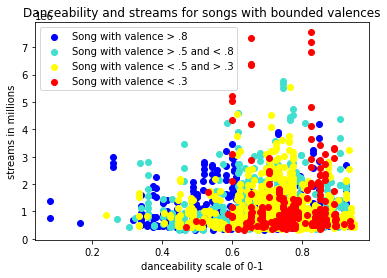

In [172]:
# Plotting songs with a high valence and varying levels of danceability against streams to see if these two values work together to impact stream counts
plt.scatter(veryLowValenceTracks['danceability'],veryLowValenceTracks['streams'], color="blue")
plt.scatter(lowValenceTracks['danceability'],lowValenceTracks['streams'], color="turquoise")
plt.scatter(highValenceTracks['danceability'],highValenceTracks['streams'], color="yellow")
plt.scatter(veryHighValenceTracks['danceability'],veryHighValenceTracks['streams'], color="red")
plt.title('Danceability and streams for songs with bounded valences')
plt.xlabel('danceability scale of 0-1')
plt.ylabel('streams in millions')
plt.legend(['Song with valence > .8', 'Song with valence > .5 and < .8', 'Song with valence < .5 and > .3', 'Song with valence < .3'])

This graph displays how the danceability of a song compares to the number of streams it has for songs that have a high valence (>.5). While there is little indication of a linear correlation, it appears that the songs with the most streams all also have a danceability of > .5. 

No longer seeing the relationship we were seeing earlier between valence and number of streams. Maybe the relationship that leads to more streams is a combination of these features together. It might be worth trying to see if there is a relationship between streams and a combination of features like valence AND loudness or tempo AND danceability

Instead of considering high valence songs, let's looks at the top streamed songs for the 1st day of every month in the year of 2017

In [173]:
top500OverYear = df.sort_values('streams', ascending=False).drop_duplicates(['artist', 'duration_ms', 'acousticness', 'danceability', 'energy'], keep='first').head(500)
top500OverYear.head(20)

index  position                                         track_name  \
200       1         1                                       Shape of You   
1000      1         1                                  Despacito - Remix   
2000      1         1                                           rockstar   
1600      1         1                           Look What You Made Me Do   
1001      2         2                                        I'm the One   
1601      2         2                                           Mi Gente   
401       2         2                           Something Just Like This   
1201      2         2      Wild Thoughts (feat. Rihanna & Bryson Tiller)   
402       3         3                    It Ain't Me (with Selena Gomez)   
2001      2         2                                             Havana   
803       4         4                                            HUMBLE.   
2202      3         3                Perfect Duet (Ed Sheeran & Beyoncé)   
601       2         2                                       Passionfruit   
201       2         2                                              Paris   
403       4         4  I Don’t Wanna Live Forever (Fifty Shades Darke...   
1203      4         4                           2U (feat. Justin Bieber)   
2002      3         3                                          New Rules   
1602      3         3                           Friends (with BloodPop®)   
2203      4         4                                             Wolves   
405       6         6                 Despacito (Featuring Daddy Yankee)   

                artist    streams  \
200         Ed Sheeran  7549041.0   
1000        Luis Fonsi  7332260.0   
2000       Post Malone  5755610.0   
1600      Taylor Swift  5547962.0   
1001         DJ Khaled  5208996.0   
1601          J Balvin  4756176.0   
401   The Chainsmokers  4581789.0   
1201         DJ Khaled  4558126.0   
402               Kygo  4529714.0   
2001    Camila Cabello  4438592.0   
803     Kendrick Lamar  4371886.0   
2202        Ed Sheeran  4250965.0   
601              Drake  4235699.0   
201   The Chainsmokers  4181293.0   
403               ZAYN  3898610.0   
1203      David Guetta  3853673.0   
2002          Dua Lipa  3758506.0   
1602     Justin Bieber  3595450.0   
2203      Selena Gomez  3590643.0   
405         Luis Fonsi  3501514.0   

                                                    url        date  \
200   https://open.spotify.com/track/7qiZfU4dY1lWllz...  2017-02-01   
1000  https://open.spotify.com/track/5CtI0qwDJkDQGwX...  2017-06-01   
2000  https://open.spotify.com/track/7wGoVu4Dady5GV0...  2017-11-01   
1600  https://open.spotify.com/track/6uFsE1JgZ20EXyU...  2017-09-01   
1001  https://open.spotify.com/track/72Q0FQQo32KJloi...  2017-06-01   
1601  https://open.spotify.com/track/2rb5MvYT7ZIxbKW...  2017-09-01   
401   https://open.spotify.com/track/6RUKPb4LETWmmr3...  2017-03-01   
1201  https://open.spotify.com/track/1OAh8uOEOvTDqkK...  2017-07-01   
402   https://open.spotify.com/track/3eR23VReFzcdmS7...  2017-03-01   
2001  https://open.spotify.com/track/0ofbQMrRDsUaVKq...  2017-11-01   
803   https://open.spotify.com/track/7KXjTSCq5nL1LoY...  2017-05-01   
2202  https://open.spotify.com/track/1bhUWB0zJMIKr9y...  2017-12-01   
601   https://open.spotify.com/track/7hDc8b7IXETo14h...  2017-04-01   
201   https://open.spotify.com/track/72jbDTw1piOOj77...  2017-02-01   
403   https://open.spotify.com/track/3NdDpSvN911VPGi...  2017-03-01   
1203  https://open.spotify.com/track/3A7qX2QjDlPnazU...  2017-07-01   
2002  https://open.spotify.com/track/2ekn2ttSfGqwhha...  2017-11-01   
1602  https://open.spotify.com/track/7nZmah2llfvLDiU...  2017-09-01   
2203  https://open.spotify.com/track/7EmGUiUaOSGDnUU...  2017-12-01   
405   https://open.spotify.com/track/4aWmUDTfIPGksMN...  2017-03-01   

      duration_ms  acousticness  danceability  energy  instrumentalness  \
200      233713.0      0.581000         0.825   0.652          0

Text(0.5, 0, 'streams in millions')

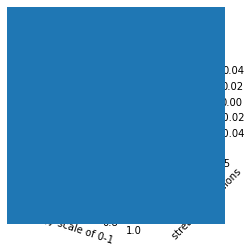

In [174]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plt.scatter(top500OverYear['valence'], top500OverYear['tempo'], top500OverYear['streams'])
plt.xlabel('energy scale of 0-1')
plt.ylabel('streams in millions')

<AxesSubplot:>

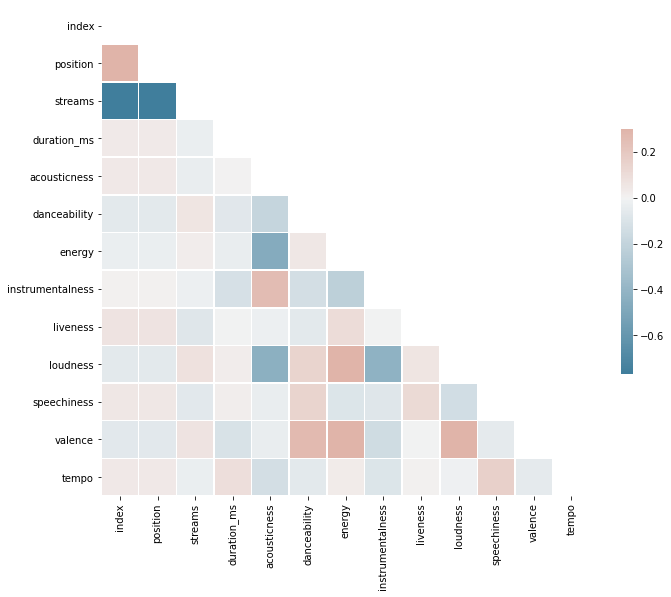

In [175]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

It seems like each individual feature has very little effect on the number of streams, which would support our findings above. After seeing this, we had a couple of ideas. It is possible different features we are currently tracking work together to make a song popular, but it is also possible we are missing other important features. After looking back at the most popular songs over the course of our entire dataframe, we noticed the majority of artists were well known or already accomplished. While it is obvious that an artists "followers" or typical listeners will increase the number of streams a song will get, it would be interesting to know if the number of typical listeners was more important than all these other aspects of the song.

We can start by getting the number of followers each artist has for every track entry in our dataframe. The Spotify API also provides a "popularity" index from 0 to 100, with 100 being the most popular. We will get this information, as well. There will be repetition between duplicate entries for an artist, but we are keeping these in so that we can still build a dataframe.

In [176]:
popularity_index_list = []
num_followers_list = []
for index, row in df.iterrows():
    print(row)
    artist_object = sp.artist(row['artist_id'])
    followers_object = artist_object['followers']
    popularity_value = artist_object['popularity']
print(popularity_index_list)
print(num_followers_list)

index                                                               1
position                                                            1
track_name                                                    Starboy
artist                                                     The Weeknd
streams                                                   3.13562e+06
url                 https://open.spotify.com/track/5aAx2yezTd8zXrk...
date                                                       2017-01-01
duration_ms                                                    230453
acousticness                                                    0.141
danceability                                                    0.679
energy                                                          0.587
instrumentalness                                             6.35e-06
liveness                                                        0.137
loudness                                                       -7.015
speechiness         

KeyError: 'artist_id'